In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2025-04-18 15:49:37.566310: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 15:49:37.974455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 15:49:38.301629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744980578.588420    5567 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744980578.663470    5567 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744980579.279258    5567 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

2.19.0


In [3]:
a = tf.constant([[1,2],[3,4]])
print(a)
a = tf.random.normal(shape=(10,3))
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-1.296533    1.964634   -0.13534766]
 [-0.8697801   0.6480674  -0.14582518]
 [ 0.11347812 -0.6666227   1.2697934 ]
 [ 1.6674975   1.41918    -1.6746067 ]
 [ 0.6599529   0.18557562 -0.3171452 ]
 [-0.18897922 -0.72494525  1.6163296 ]
 [ 1.4349558   0.12525599  0.33311215]
 [ 0.69647014  0.23802787 -1.5317138 ]
 [-0.57999045  0.9952556   1.0030856 ]
 [ 0.31878582 -0.2906592   1.161229  ]], shape=(10, 3), dtype=float32)


2025-04-18 15:54:22.034521: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
print(a-a[0])
print(tf.exp(a)[0].numpy())

tf.Tensor(
[[ 0.          0.          0.        ]
 [ 0.42675287 -1.3165665  -0.01047751]
 [ 1.410011   -2.6312566   1.4051411 ]
 [ 2.9640305  -0.5454539  -1.539259  ]
 [ 1.9564859  -1.7790583  -0.18179753]
 [ 1.1075537  -2.6895792   1.7516773 ]
 [ 2.7314887  -1.839378    0.4684598 ]
 [ 1.9930031  -1.7266061  -1.3963661 ]
 [ 0.71654254 -0.96937835  1.1384332 ]
 [ 1.6153188  -2.2552931   1.2965767 ]], shape=(10, 3), dtype=float32)
[0.2734783 7.1323013 0.8734122]


In [6]:
s = tf.Variable(tf.zeros_like(a[0]))
for i in a:
    s.assign_add(i)

print(s)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1.9558574, 3.8937695, 1.5789111], dtype=float32)>


In [7]:
tf.reduce_sum(a,axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.9558574, 3.8937695, 1.5789111], dtype=float32)>

In [ ]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

with tf.GradientTape() as tape:
    tape.watch(a)
    c= tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
    print(dc_da)

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

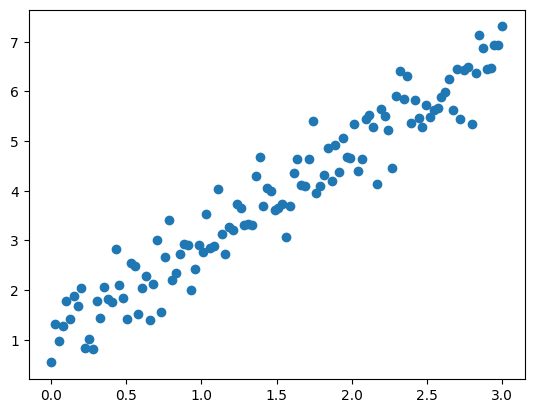

In [23]:
np.random.seed(13)

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

In [30]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

w = tf.Variable([[100.0]])
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def f(x):
    return tf.matmul(x,w) + b

def compute_loss(labels,predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

In [42]:
@tf.function
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = f(x)
        loss = compute_loss(y, predictions)    
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss
    

In [54]:
indices = np.random.permutation(len(train_x))
features = tf.constant(train_x[indices], dtype=tf.float32)
labels = tf.constant(train_labels[indices],dtype=tf.float32)

In [ ]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(tf.reshape(features[i:i+batch_size], (-1,1)),tf.reshape(labels[i:i+batch_size],(-1,1)))
        print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 2.0106
Epoch 0: last batch loss = 1.7754
Epoch 0: last batch loss = 1.0755
Epoch 0: last batch loss = 1.6449
Epoch 0: last batch loss = 1.5665
Epoch 0: last batch loss = 2.6036
Epoch 0: last batch loss = 0.9287
Epoch 0: last batch loss = 1.4189
Epoch 0: last batch loss = 1.4635
Epoch 0: last batch loss = 0.3921
Epoch 0: last batch loss = 1.0131
Epoch 0: last batch loss = 1.5268
Epoch 0: last batch loss = 3.1448
Epoch 0: last batch loss = 2.2234
Epoch 0: last batch loss = 0.2724
Epoch 0: last batch loss = 2.2008
Epoch 0: last batch loss = 0.6442
Epoch 0: last batch loss = 1.3575
Epoch 0: last batch loss = 1.2365
Epoch 0: last batch loss = 0.2494
Epoch 0: last batch loss = 0.6994
Epoch 0: last batch loss = 0.6440
Epoch 0: last batch loss = 0.5927
Epoch 0: last batch loss = 0.4314
Epoch 0: last batch loss = 0.2586
Epoch 0: last batch loss = 0.0770
Epoch 0: last batch loss = 0.7574
Epoch 0: last batch loss = 0.6192
Epoch 0: last batch loss = 0.2381
Epoch 0: last 

In [57]:
w.assign([[10.0]])
b.assign([0.0])

dataset = tf.data.Dataset.from_tensor_slices((train_x.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(tf.reshape(x,(-1,1)), tf.reshape(y, (-1,1)))
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))    

Epoch 0: last batch loss = 173.4585
Epoch 1: last batch loss = 13.8459
Epoch 2: last batch loss = 4.5407
Epoch 3: last batch loss = 3.7364
Epoch 4: last batch loss = 3.4334
Epoch 5: last batch loss = 3.1790


2025-04-18 18:38:15.046115: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6: last batch loss = 2.9458
Epoch 7: last batch loss = 2.7311
Epoch 8: last batch loss = 2.5332
Epoch 9: last batch loss = 2.3508


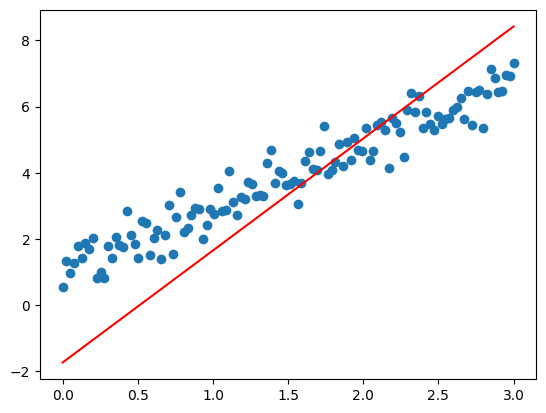

In [ ]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
y = w.numpy()[0,0]*x+b.numpy()[0]
plt.plot(x,y,color='red')

In [60]:
np.random.seed(0)

n = 100
X, Y = make_classification(n_samples=n, n_features=2, n_redundant=0, n_informative=2, flip_y=0.05,class_sep=1.5)

X = X.astype(np.float32)
Y = Y.astype(np.int32)
split = [ 70*n//100, (15+70)*n//100 ]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)
 

In [73]:
def plot_dataset(features, labels, W=None, b=None):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha=0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,0])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show
    

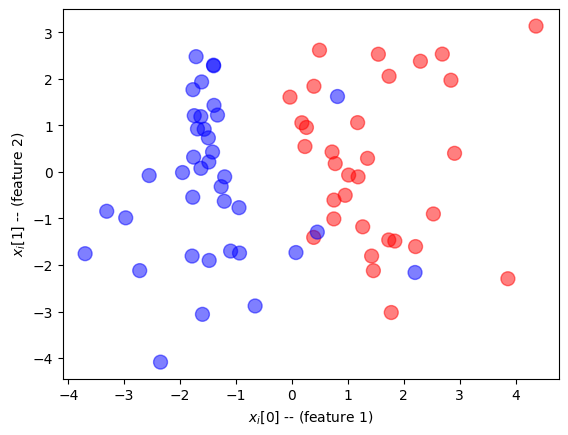

In [74]:

plot_dataset(train_x, train_labels)

In [75]:
train_x_norm = (train_x-np.min(train_x)) / (np.max(train_x) - np.min(train_x))
valid_x_norm = (valid_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))
test_x_norm = (test_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))

In [76]:

W = tf.Variable(tf.random.normal(shape=(2,1)),dtype=tf.float32)
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

learning_rate = 0.1

@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    z = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=z))
    dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss
    

In [81]:
dataset = tf.data.Dataset.from_tensor_slices((train_x_norm.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(128).batch(2)

for epoch in range(40):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, tf.expand_dims(y,1))
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.3678
Epoch 1: last batch loss = 0.3963
Epoch 2: last batch loss = 0.4842
Epoch 3: last batch loss = 0.2855
Epoch 4: last batch loss = 0.2874
Epoch 5: last batch loss = 0.4081
Epoch 6: last batch loss = 0.4168
Epoch 7: last batch loss = 0.3477
Epoch 8: last batch loss = 1.0498
Epoch 9: last batch loss = 0.6956
Epoch 10: last batch loss = 0.2357
Epoch 11: last batch loss = 0.3198
Epoch 12: last batch loss = 0.1047
Epoch 13: last batch loss = 0.4387
Epoch 14: last batch loss = 0.3212
Epoch 15: last batch loss = 0.4759
Epoch 16: last batch loss = 0.4472
Epoch 17: last batch loss = 0.2827
Epoch 18: last batch loss = 0.2452
Epoch 19: last batch loss = 0.1205
Epoch 20: last batch loss = 0.4809
Epoch 21: last batch loss = 0.3096
Epoch 22: last batch loss = 0.2498
Epoch 23: last batch loss = 0.1116
Epoch 24: last batch loss = 0.1946
Epoch 25: last batch loss = 0.1578
Epoch 26: last batch loss = 0.2248
Epoch 27: last batch loss = 0.1303
Epoch 28: last batch loss = 0.

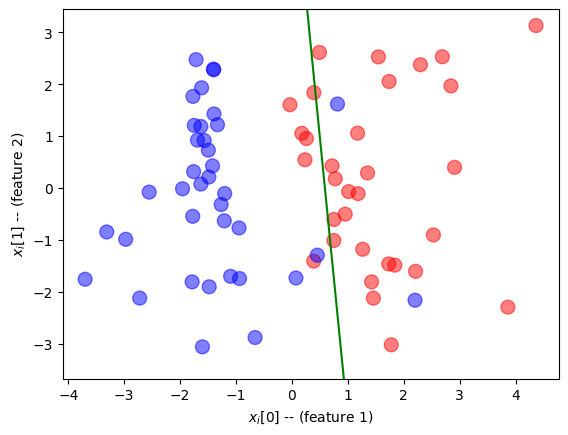

In [ ]:
plot_dataset(train_x,train_labels,W.numpy(),b.numpy())

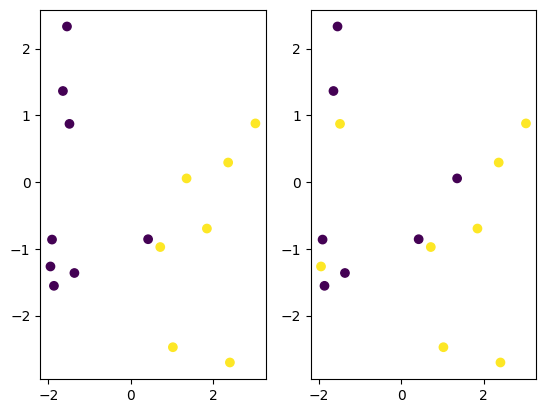

In [83]:
pred = tf.matmul(test_x,W)+b
fig,ax = plt.subplots(1,2)
ax[0].scatter(test_x[:,0],test_x[:,1],c=pred[:,0]>0.5)
ax[1].scatter(test_x[:,0],test_x[:,1],c=valid_labels)

In [84]:
tf.reduce_mean(tf.cast(((pred[0]>0.5)==test_labels),tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.46666666865348816>